In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import time
import os
import json
import re

from rdflib.util import first
from spacy.lang.ja.syntax_iterators import labels

%load_ext autoreload
%autoreload 2



In [ ]:
COUNTRIES_DICT = {
    "Q29": {"country": "Spain", "languages": ["es", "ca", "gl", "eu"], "flag": "ES"},  # Spanish, Catalan, Galician, Basque
    "Q45": {"country": "Portugal", "languages": ["pt"], "flag": "PT"},  # Portuguese
    "Q142": {"country": "France", "languages": ["fr"], "flag": "FR"},  # French
    "Q233": {"country": "Malta", "languages": ["mt"], "flag": "MT"},  # Maltese
    "Q41": {"country": "Greece", "languages": ["el"], "flag": "GR"},  # Greek
    "Q38": {"country": "Italy", "languages": ["it"], "flag": "IT"},  # Italian
    "Q183": {"country": "Germany", "languages": ["de"], "flag": "DE"},  # German
    "Q31": {"country": "Belgium", "languages": ["nl", "fr", "de"], "flag": "BE"},  # Dutch, French, German
    "Q55": {"country": "Netherlands", "languages": ["nl"], "flag": "NL"},  # Dutch
    "Q34": {"country": "Sweden", "languages": ["sv"], "flag": "SE"},  # Swedish
    "Q20": {"country": "Norway", "languages": ["no", "nb", "nn"], "flag": "NO"},  # Norwegian
    "Q33": {"country": "Finland", "languages": ["fi", "sv"], "flag": "FI"},  # Finnish, Swedish
    "Q211": {"country": "Latvia", "languages": ["lv"], "flag": "LV"},  # Latvian
    "Q191": {"country": "Estonia", "languages": ["et"], "flag": "EE"},  # Estonian
    "Q37": {"country": "Lithuania", "languages": ["lt"], "flag": "LT"},  # Lithuanian
    "Q36": {"country": "Poland", "languages": ["pl"], "flag": "PL"},  # Polish
    "Q28": {"country": "Hungary", "languages": ["hu"], "flag": "HU"},  # Hungarian
    "Q218": {"country": "Romania", "languages": ["ro"], "flag": "RO"},  # Romanian
    "Q214": {"country": "Slovakia", "languages": ["sk"], "flag": "SK"},  # Slovak
    "Q213": {"country": "Czech Republic", "languages": ["cs"], "flag": "CZ"},  # Czech
    "Q215": {"country": "Slovenia", "languages": ["sl"], "flag": "SI"}  # Slovene
}
with open('./data/country_dictionary.json', 'w', encoding='utf-8') as f:
    json.dump(COUNTRIES_DICT, f, ensure_ascii=False, indent=4)

In [ ]:
class_df = pd.read_csv("./data/wikidata_organization_classes.csv")
class_df.loc[class_df["country"] == "Q20", ["class_ids", "names", "classes"]] = "Unknown"
class_df.to_csv("./data/wikidata_organization_classes.csv", index=False)

In [ ]:
import pandas as pd
from orgpackage.dataprocesser import extract_wikidata_classes, plot_data_classes

extract_wikidata_classes("./data/wikidata_organization_classes.csv", english_label=False)

In [ ]:
class_df = pd.read_csv("./data/wikidata_organization_classes.csv")
unknown_df = class_df[class_df["classes"] == "Unknown"]
from orgpackage.dataprocesser import plot_data_volume
plot_data_volume(unknown_df)

In [ ]:
class_df = pd.read_csv("./data/wikidata_organization_classes.csv")
known_df = class_df[class_df["classes"] != "Unknown"]
plot_data_volume(known_df)

known_df.loc[:, "names"] = known_df["names"].str.split(",")
known_df.loc[:, "class_ids"] = known_df["class_ids"].str.split(",")
known_df.loc[:, "classes"] = known_df["classes"].str.split(",")
known_df.to_csv("./data/wikidata_organizations_dataset.csv", index=False)

In [ ]:
entity_dict = {
    "local_government": "Q6501447",
    "hospital": "Q16917",
    "university_hospital": "Q1059324",
    "public_school": "Q1080794",
    "school": "Q3914",
    "educational_institution": "Q2385804",
    "primary_school": "Q9842",
    "secondary_school": "Q159334"
}
with open('./data/entity_dictionary.json', 'w', encoding='utf-8') as f:
    json.dump(entity_dict, f, ensure_ascii=False, indent=4)

In [ ]:
from orgpackage.dataprocesser import obtain_subhierarchy
#
#Q6501447 -local government
#Q16917 - hospital
#Q1059324 - university hospital
#Q1080794 - public school
#Q3914 - school
# Q2385804 - educational institution
# obtain_subhierarchy('Q6501447')
# obtain_subhierarchy('Q16917')
# obtain_subhierarchy('Q1080794')
# obtain_subhierarchy('Q3914')
obtain_subhierarchy(entity_dict["primary_school"])
obtain_subhierarchy(entity_dict["secondary_school"])

In [ ]:
from orgpackage.dataprocesser import plot_data_volume

org_df = pd.read_csv("./data/wikidata_organizations_dataset.csv")
uhospital_df =  pd.read_csv("./data/wikidata_Q1059324_hierarchy.csv")
lgov_df =  pd.read_csv("./data/wikidata_Q6501447_hierarchy.csv")
hospital_df =  pd.read_csv("./data/wikidata_Q16917_hierarchy.csv")
school_df =  pd.read_csv("./data/wikidata_Q3914_hierarchy.csv")
pschool_df = pd.read_csv("./data/wikidata_"+entity_dict["primary_school"]+"_hierarchy.csv")
sschool_df = pd.read_csv("./data/wikidata_"+entity_dict["secondary_school"]+"_hierarchy.csv")
  
plot_data_volume([org_df, hospital_df, uhospital_df],['organizations','hospitals','university hospitals'])
plot_data_volume([org_df, lgov_df],['organizations','local governments'])
plot_data_volume([org_df, school_df, pschool_df, sschool_df],['organizations','schools','primary schools','secondary schools'])

In [ ]:
from orgpackage.dataprocesser import enricher
enriched_df = enricher()
display(enriched_df)
plot_data_classes(enriched_df)
from orgpackage.dataprocesser import load_dataset
#org_df = pd.read_csv('./data/wikidata_organization_classes.csv')
#display(org_df)

In [ ]:
enriched_df.to_csv("./data/wikidata_enriched_dataset.csv", index=False)

In [ ]:
import json  
from orgpackage.dataprocesser import *
with open('./data/entity_dictionary.json', 'r', encoding='utf-8') as f:
    entity_dict = json.load(f)
dfs = []
lbls = []
for cls in entity_dict:
    dfs.append(pd.read_csv("./data/wikidata_"+cls+"_dataset.csv"))
    lbls.append(cls)
plot_data_volume(dfs, labels=lbls)

In [ ]:
for cls in ['Q16917', 'Q1059324', 'Q6501447', 'Q3914', 'Q1080794']:
    df = pd.read_csv("./data/wikidata_"+entity_dict[cls]+"_dataset.csv")
    df['class_ids'] = df['class_ids'].apply(ast.literal_eval)
    df['classes'] = df['classes'].apply(ast.literal_eval)
    top_100_classes = most_common_classes(df)[:25]  # Get first 100 elements
    class_df = pd.DataFrame(top_100_classes, columns=['class', 'count'])
    display(class_df)


In [ ]:
enriched_df.to_csv("./data/wikidata_enriched_dataset.csv", index=False)

In [ ]:
print(enriched_df.columns)

In [ ]:
from orgpackage.dataprocesser import plot_data_classes, load_dataset
#enriched_df = load_dataset("./data/wikidata_enriched_dataset.csv")

plot_data_classes(enriched_df)

In [ ]:
counts =enriched_df[enriched_df['university hospital']==1]['country'].value_counts()
print((counts[counts>10].keys()))

In [ ]:
from orgpackage.dataprocesser import load_dataset
import pandas as pd

df = load_dataset('./data/wikidata_enriched_dataset.csv')
df["names"] = df["names"].apply(lambda x: x[0])
display(df)
df['names'].apply(len).value_counts()

In [ ]:
from orgpackage.dataprocesser import load_dataset
df = load_dataset('./data/wikidata_enriched_dataset.csv')
df = df.loc[df['country']!='Q20']
display(df)
df.to_csv("./data/wikidata_enriched_dataset.csv", index=False)

In [ ]:
import ssl
import certifi
import os

os.environ["SSL_CERT_FILE"] = certifi.where()
ssl._create_default_https_context = ssl._create_unverified_context 
from orgpackage.dataprocesser import extract_wikidata_instances
extract_wikidata_instances()

In [ ]:
from orgpackage.dataprocesser import read_raw_instance_results
df = read_raw_instance_results()
#print(df.groupby('country').count())

In [ ]:
print(len(df))

In [ ]:
from orgpackage.dataprocesser import *
df.to_csv("./data/wikidata_org_extra.csv", index=False)
generate_clean_class_df("./data/wikidata_org_extra.csv", "./data/wikidata_org_extra.csv")
extract_wikidata_classes("./data/wikidata_org_extra.csv", english_label=False)
extract_wikidata_classes("./data/wikidata_org_extra.csv", english_label=True)

In [ ]:
# 
for class_id in ["Q6501447","Q16917","Q9842","Q159334"]:
    extract_wikidata_instances(class_id=class_id)
    read_raw_instance_results(class_id=class_id).to_csv("./data/wikidata_"+class_id+"_hierarchy_extra.csv")
    generate_clean_class_df("./data/wikidata_"+class_id+"_hierarchy_extra.csv", "./data/wikidata_"+class_id+"_hierarchy_extra.csv")
    extract_wikidata_classes("./data/wikidata_"+class_id+"_hierarchy_extra.csv", english_label=False)
    extract_wikidata_classes("./data/wikidata_"+class_id+"_hierarchy_extra.csv", english_label=True)
    df_original = pd.read_csv("./data/wikidata_"+class_id+"_hierarchy.csv")
    new_df = pd.read_csv("./data/wikidata_"+class_id+"_hierarchy_extra.csv")
    pd.concat([new_df, df_original], ignore_index=True).to_csv("./data/wikidata_"+class_id+"_hierarchy.csv", index=False)
    import os
    os.remove("./data/wikidata_"+class_id+"_hierarchy_extra.csv")


In [ ]:
entity_dict = {
    "local_government": "Q6501447",
    "hospital": "Q16917",
    "university_hospital": "Q1059324",
    "public_school": "Q1080794",
    "school": "Q3914",
    "educational_institution": "Q2385804",
    "primary_school": "Q9842",
    "secondary_school": "Q159334"
}
for cls in ['hospital','university_hospital','local_government','primary_school', 'secondary_school']:
    class_df = pd.read_csv("./data/wikidata_"+entity_dict[cls]+"_hierarchy.csv")
    class_df = class_df.drop(columns=['Unnamed: 0']) # I messed up index storing somewhere in the hierarchy generation
    known_df = class_df[class_df["classes"] != "Unknown"]
    known_df.loc[:, "names"] = known_df["names"].str.split(",")
    known_df.loc[:, "class_ids"] = known_df["class_ids"].str.split(",")
    known_df.loc[:, "classes"] = known_df["classes"].str.split(",")
    known_df.to_csv("./data/wikidata_"+cls+"_dataset.csv", index=False)


aux hospital
6974
before hospital
1239
after hospital
6974
aux university_hospital
186
before university_hospital
186
after university_hospital
186
aux local_government
18617
before local_government
3182
after local_government
18617
aux primary_school
24568
before primary_school
4434
after primary_school
24568
aux secondary_school
15762
before secondary_school
3661
after secondary_school
15762


,instance,country,names,class_ids,classes,hospital,university_hospital,local_government,primary_school,secondary_school
0,http://www.wikidata.org/entity/Q112984500,Q142,Foyer Logement de Guer,[http://www.wikidata.org/entity/Q30114662],[accommodation facility for dependent elderly ...,0,0,0,0,0
1,http://www.wikidata.org/entity/Q174928,Q142,Saint-André-d'Allas,[http://www.wikidata.org/entity/Q484170],[commune of France],0,0,0,0,0
2,http://www.wikidata.org/entity/Q1167843,Q142,Ménonval,[http://www.wikidata.org/entity/Q484170],[commune of France],0,0,0,0,0
3,http://www.wikidata.org/entity/Q119718461,Q142,54e régiment d'artillerie coloniale,[http://www.wikidata.org/entity/Q176799],[military unit],0,0,0,0,0
4,http://www.wikidata.org/entity/Q1049782,Q142,Han-devant-Pierrepont,[http://www.wikidata.org/entity/Q484170],[commune of France],0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
182532,http://www.wikidata.org/entity/Q113813349,Q55,Dalton College,[http://www.wikidata.org/entity/Q159334],[secondary school],0,0,0,0,1
182533,http://www.wikidata.org/entity/Q116194320,Q55,Wings Niekée Agoraschool,[http://www.wikidata.org/entity/Q159334],[secondary school],0,0,0,0,1
182534,http://www.wikidata.org/entity/Q116353302,Q55,Sweelinck College,[http://www.wikidata.org/entity/Q159334],[secondary school],0,0,0,0,1
182535,http://www.wikidata.org/entity/Q130889779,Q55,Eijkhagen College,[http://www.wikidata.org/entity/Q159334],[secondary school],0,0,0,0,1


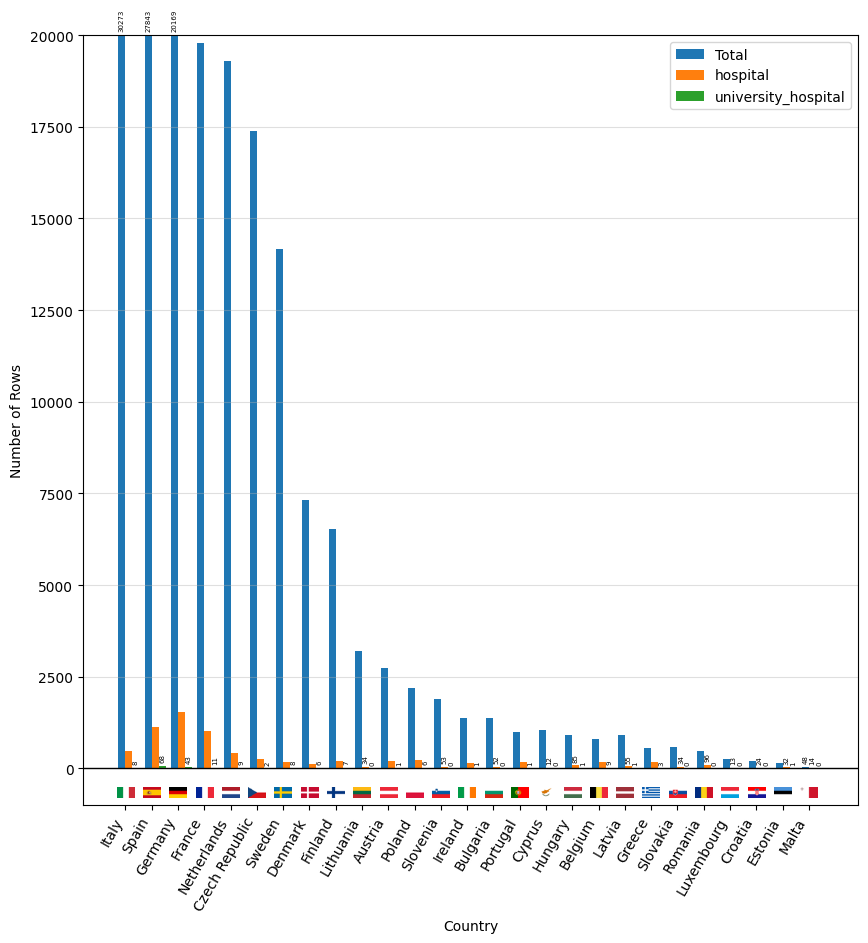

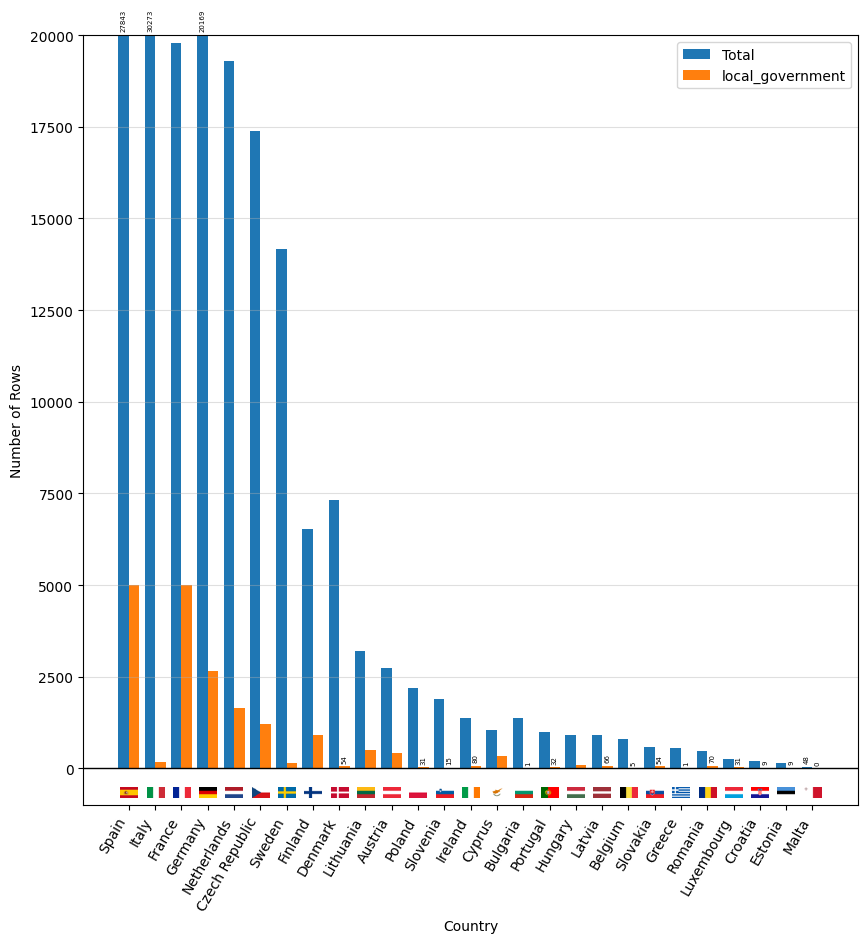

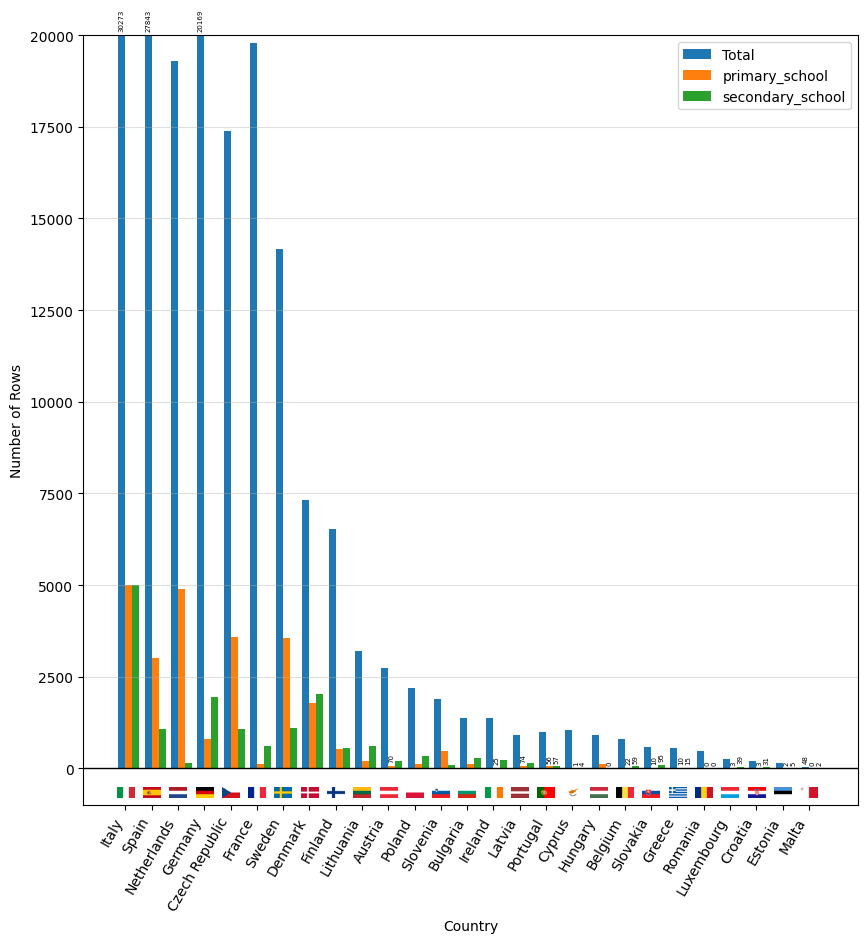

In [1]:
from orgpackage.dataprocesser import enricher, plot_data_classes
enriched_df = enricher()
display(enriched_df)
plot_data_classes(enriched_df)

In [2]:
enriched_df.to_csv("./data/wikidata_enriched_dataset.csv", index=False)